In [15]:
ROOT = "/content/drive/MyDrive/Deep learning notebooks/General"

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
os.chdir(ROOT)

In [18]:
os.getcwd()

'/content/drive/MyDrive/Deep learning notebooks/General'

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

plt.style.use("fivethirtyeight")

In [20]:
class Perceptron:
  def __init__(self, eta, epochs, activationFunction):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
    self.activationFunction = activationFunction

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [21]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

```python
def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z > 0, 1, 0)
  return y_hat

def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  if z > 0:
    y_hat = 1
  else:
    y_hat = 0
  return y_hat


```

# AND

In [22]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [23]:
X = AND.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [24]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [25]:
model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)

self.weights: [-5.15834004e-05 -1.09895385e-04 -5.87963947e-05]


In [26]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 0 1 0]
error: 
0   -1
1    0
2   -1
3    1
Name: y, dtype: int64
updated weights: 
[-5.15834004e-05  4.99890105e-01  4.99941204e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 4.99948417e-01  9.99890105e-01 -5.87963947e-05]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-5.15834004e-05  4.99890105e-01  1.49994120e+00]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.49994842 0.9998901  0.9999412 ]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49994842 0.9998901  0.9999412 ]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
erro

In [27]:
model.predict(X)

array([0, 0, 0, 1])

# OR

In [28]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [29]:
X = OR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [30]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [31]:
model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)

self.weights: [-9.82049181e-05  2.83607571e-05 -1.56689190e-04]


In [32]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[-9.82049181e-05  2.83607571e-05  4.99843311e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 0.9999018   1.00002836 -1.00015669]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 0.9999018   1.00002836 -0.50015669]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 9.99901795e-01  1.00002836e+00 -1.56689190e-04]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.9999018  1.00002836 0.49984331]
#############

for epoch: 5
predicted value: 
[0 1 1 1]
error: 
0    

# XOR

In [33]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [34]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [35]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [36]:
model = Perceptron(eta = 0.5, epochs=50, activationFunction=activationFunction)


self.weights: [ 2.07200249e-04 -1.10444570e-04 -5.66317492e-05]


In [37]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 0 1 1]
error: 
0   -1
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99792800e-01 -1.10444570e-04  4.99943368e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 2.07200249e-04  4.99889555e-01 -5.00056632e-01]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99792800e-01 -1.10444570e-04  4.99943368e-01]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 2.07200249e-04  4.99889555e-01 -5.00056632e-01]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99792800e-01 -1.10444570e-04  4.99943368e-01]
#############

for epoch: 5
pr

In [38]:
model.predict(X)

array([1, 1, 1, 1])

# Analysis with the graph

### AND GATE

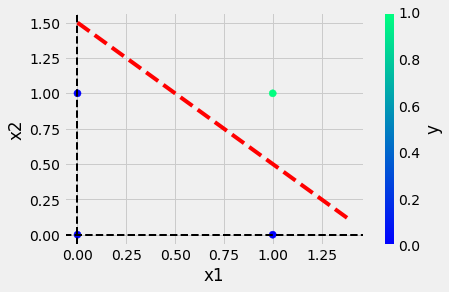

In [39]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

### OR

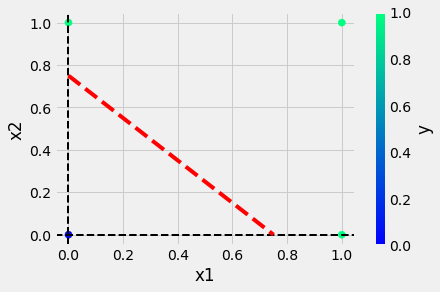

In [40]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

# XOR

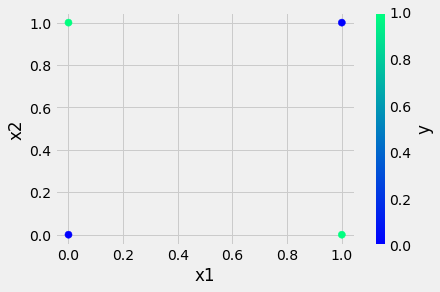

In [42]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
